# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.633689e+01     1.373872e+01
 * time: 0.0018548965454101562
     1     3.543498e+01     9.541074e+00
 * time: 0.005558967590332031
     2     2.623495e+01     3.239375e+00
 * time: 0.01158905029296875
     3     2.314644e+01     2.693156e+00
 * time: 0.016696929931640625
     4     2.239526e+01     5.186685e+00
 * time: 0.021043062210083008
     5     2.006647e+01     2.881978e+00
 * time: 0.025311946868896484
     6     1.895570e+01     1.743018e+00
 * time: 0.030453920364379883
     7     1.854158e+01     1.326917e+00
 * time: 0.03462100028991699
     8     1.821661e+01     1.116262e+00
 * time: 0.03874611854553223
     9     1.795123e+01     7.847741e-01
 * time: 0.04298210144042969
    10     1.777162e+01     9.205284e-01
 * time: 0.04718899726867676
    11     1.775831e+01     1.439574e+00
 * time: 0.05049395561218262
    12     1.775679e+01     1.361620e+00
 * time: 0.05404496192932129
    13     1.762772e+01     8.261155e-01
 

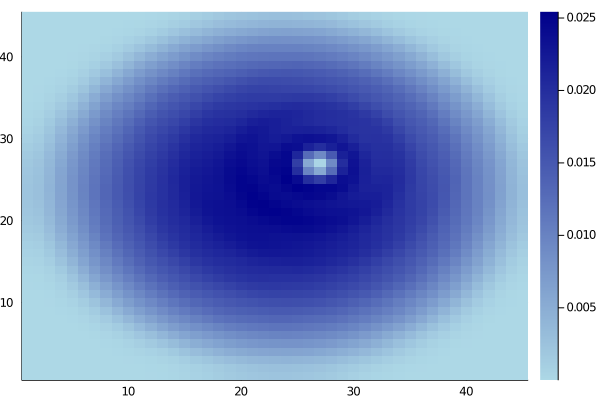

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)